# <font color='#000000'>Master Thesis Hugo Alves | <span style="color:#BFD62F;">__Nova__</span> <span style="color:#5C666C;">__IMS__</span></font>

Welcome to the continuation of the second notebook developed for this project. We (Professor Roberto Henriques, Professor Ricardo Santos, and Hugo Alves) aim to develop a machine learning (ML) framework to predict student admissions to postgraduate and masters' programs at Nova IMS, as well as the final grade point average (GPA) of those who are accepted.

<br>
<div align="center">
  <img src="https://i.ibb.co/nLy596G/Notebooks-Workflow.png" alt="Workflow" width="800" />
</div>
<br>

After our initial exploration of the available data, we can now shift our focus to __data preparation and preprocessing__. Here, we will deal with the transformations that are exclusive to the task of predicting admissions. Enjoy!


# <font color="#5C666C">Contents</font> <a class="anchor" id="toc"></a>
[Initial Setup](#setup)<br>
- [ Library and Functions Import](#library)<br>
- [ Retrieving the Dataframes](#dataframes)<br>

[3. Data Preprocessing](#preprocessing)<br>
- [3.5. Scaling](#scaling)<br>
- [3.6. Feature Selection](#selection)<br>
  - [3.6.1. Spearman Correlation](#spearman)<br>
  - [3.6.2. ANOVA](#anova)<br>
  - [3.6.3. Chi-Square Test of Independence](#chisquare)<br>
  - [3.6.4. Point Biserial Correlation](#biserial)<br>
  - [3.6.5. Recursive Feature Elimination - Logistic Regression](#rfelr)<br>
  - [3.6.6. Recursive Feature Elimination - Support Vector Machines](#rfesvm)<br>
  - [3.6.7. Random Forest](#rf)<br>
  - [3.6.8. Least Absolute Shrinkage and Selection Operator (LASSO)](#lasso)<br>
  - [3.6.9. Conclusion](#conclusion)<br>
- [3.7. DBSCAN for Outlier Removal](#dbscan)<br>
- [3.8. Oversampling](#oversampling)<br>
- [3.9. Storing the Dataframes](#storing)<br>

</div>

# <font color="#BFD62F">_____________</font>
# <font color='#5C666C'>Initial Setup</font> <a class="anchor" id="setup"></a>
[Back to Contents](#toc)

## <font color='#BFD62F'>Library and Functions Import</font> <a class="anchor" id="library"></a>
[Back to Contents](#toc)

In [1]:
#!python --version

We will be using the Python version 3.11.8.

In [2]:
#! pip install pandas==2.2.1
#! pip install numpy==1.24.4
#! pip install matplotlib==3.8.3
#! pip install seaborn==0.12.2
#! pip install plotly==5.20.0
#! pip install tenacity==8.2.2
#! pip install openpyxl>=3.1.0
#% pip install nbformat>=4.3.0
#! pip install rapidfuzz==3.11.0
#! pip install xlrd==2.0.1
#! pip install sklearn==1.2.2
#! pip install imblearn==0.11.0

In [3]:
%run Imports

In [4]:
import Functions as tf

## <font color='#BFD62F'>Retrieving the Dataframes </font> <a class="anchor" id="dataframes"></a>
[Back to Contents](#toc)

Let's retrieve the dataframes that we used in the previous notebook.

In [5]:
%store -r df_admissions

%store -r X_admissions_train
%store -r X_admissions_val
%store -r y_admissions_train
%store -r y_admissions_val

# <font color='#BFD62F'>_________________________________________</font>
# <font color='#5C666C'>3. Data Preparation and Preprocessing </font> <a class="anchor" id="preprocessing"></a>
[Back to Contents](#toc)

<br>

## <font color='#BFD62F'>3.5. Scaling</font> <a class="anchor" id="scaling"></a>
[Back to Contents](#toc)

Our first step (of this specific preprocessing stage) will be to scale our data so that all variables fall in a range between 0 and 1. The most direct alternative to this option would be to normalize data. However, since the number of variables that we expect to follow a Gaussian distribution is very reduced, this alternative will be disconsidered.

In [6]:
X_admissions_train.head()

,idgenero,nivelInglesCompreensao,nivelInglesFala,nivelInglesEscrita,dprograma,NumberAcademicExperiences,NumberAcademicDegrees,HighestAcademicDegree,Rank,Student Population,Students to Staff Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook,Percentage_International_Students,Percentage_Female_Students,Is_Ranked,Previous_IMS_Student,Previous_Data_Studies,Previous_Computer_Studies,Previous_Tech_Studies,Previous_Math_Studies,Previous_Engineering_Studies,Previous_Finance_Studies,Previous_Marketing_Studies,Previous_Field_Studies,Number_Studied_Fields,Non_Finished_Programs,Prop_Finished_Programs,AverageScaledGrade,MaxScaledGrade,MinScaledGrade,countries_region,countries_dist,countries_GDP_per_capita,is_Portuguese,datacandidaturafim_month,datacandidaturafim_day,datacandidaturafim_time_of_day,is_After_Working_Hours,is_Fully_In_Person,Program_Name,Number_Professional_Experiences,Years_of_Experience,Years_of_Longest_Prof_Experience,Working_Upon_Application,Previous_Data_Jobs,Previous_Analytics_Jobs,Previous_Computing_Jobs,Previous_Tech_Jobs,Previous_Math_Jobs,Previous_Engineering_Jobs,Previous_Finance_Jobs,Previous_Marketing_Jobs,Previous_Project_Jobs,Previous_Field_Jobs,Number_Fields_Worked,Previous_Trainee_Jobs,Previous_Jobs_in_Partners,AverageAcademicDegree,datacandidaturafim_day_of_week_sin,datacandidaturafim_day_of_week_cos
6442,1,5,5,5,1,1,1,3,1471.0,48837.0,36.299999,25.708500,15.900000,9.3,48.700001,17.4,40.200001,0.0,48.0,1,0,0,0,0,0,0,0,0,0,0,0,1.0,0.84,0.84,0.84,1,3810.1860,1637.468,0,5,12,0,0,1,0.005562,3,4,1,1,0,0,0,1,0,0,0,0,0,1,1,1,0,3.0,0.433884,-0.900969
7521,0,2,2,2,0,2,2,4,2100.0,18192.0,18.299999,33.555000,18.200001,11.5,63.900002,23.1,49.500000,3.0,45.0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.96,0.96,0.96,2,9162.3600,2651.738,0,3,10,0,0,1,0.024954,1,10,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3.5,-0.433884,-0.900969
13488,0,4,4,4,0,1,1,3,2100.0,14080.0,14.800000,32.587502,24.299999,16.1,53.299999,36.0,54.799999,16.0,55.0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.60,0.60,0.60,0,114.3257,27834.773,1,8,12,1,0,1,0.004683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,0.781832,0.623490
10078,1,1,1,1,0,1,1,3,2100.0,14080.0,14.800000,32.587502,24.299999,16.1,53.299999,36.0,54.799999,16.0,55.0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.60,0.60,0.60,0,114.3257,27834.773,1,3,31,1,0,1,0.044420,1,4,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,-0.974928,-0.222521
2367,0,4,4,4,0,1,1,4,2100.0,14080.0,14.800000,32.587502,24.299999,16.1,53.299999,36.0,54.799999,16.0,55.0,0,0,0,0,0,0,1,0,0,1,1,0,1.0,0.80,0.80,0.80,0,114.3257,27834.773,1,4,30,0,0,1,0.071716,1,5,5,1,1,1,1,0,0,0,0,0,0,1,3,0,0,4.0,0.974928,-0.222521


In [7]:
features_to_scale = ["idgenero", "nivelInglesCompreensao", "nivelInglesFala", "nivelInglesEscrita",
                     "NumberAcademicExperiences", "NumberAcademicDegrees", "HighestAcademicDegree",
                     "Rank", "Student Population", "Students to Staff Ratio", "Overall Score",
                     "Teaching", "Research Environment", "Research Quality", "Industry Impact", "International Outlook",
                     "Percentage_International_Students", "Percentage_Female_Students", "Number_Studied_Fields",
                     "Non_Finished_Programs", "Prop_Finished_Programs", "AverageScaledGrade", "MaxScaledGrade", "MinScaledGrade",
                     "countries_region", "countries_dist", "countries_GDP_per_capita",
                     "datacandidaturafim_month", "datacandidaturafim_day", "datacandidaturafim_time_of_day",
                     "Program_Name", "Number_Professional_Experiences", "Years_of_Experience", "Years_of_Longest_Prof_Experience",
                     "Number_Fields_Worked", "AverageAcademicDegree", "datacandidaturafim_day_of_week_sin",
                     "datacandidaturafim_day_of_week_cos"]

X_admissions_train_to_scale = X_admissions_train[features_to_scale]
X_admissions_val_to_scale = X_admissions_val[features_to_scale]

In [8]:
scaler = MinMaxScaler().fit(X_admissions_train_to_scale)

min_max_X_admissions_train = scaler.transform(X_admissions_train_to_scale)
X_admissions_train_scaled = pd.DataFrame(min_max_X_admissions_train, columns = features_to_scale, index = X_admissions_train.index)
X_admissions_train_scaled = pd.concat([X_admissions_train.drop(columns = features_to_scale), X_admissions_train_scaled], axis = 1)

min_max_X_admissions_val = scaler.transform(X_admissions_val_to_scale)
X_admissions_val_scaled = pd.DataFrame(min_max_X_admissions_val, columns = features_to_scale, index = X_admissions_val.index)
X_admissions_val_scaled = pd.concat([X_admissions_val.drop(columns = features_to_scale), X_admissions_val_scaled], axis = 1)

## <font color='#BFD62F'>3.6. Feature Selection </font> <a class="anchor" id="selection"></a>
[Back to Contents](#toc)

Our feature selection will involve the use of a group of filter, wrapper, and embedded techniques, which will then allow us to take a conclusion regarding the variables that will proceed to the modelling stage. We will use:
* __Spearman's Correlation__ to identify numerical features that are correlated with each other (and, therefore, are redundant).
* __Analysis of Variance (ANOVA)__ to assess if these numerical features have some correlation with the target. The resultant p-value will also be our way to compare the pairs of correlated variables identified through Spearman's Correlation and decide which should be discarded according to this technique.
* __Chi-Square Test of Independence__ to evaluate the correlation between each categorical variable and the target.
* __Point Biserial Correlation__ is a variation of Pearson's correlation suited to assess the relationship between a binary and a numerical variable. Therefore, similarly to the ANOVA, we will use it to assess if our numerical features are to any extent correlated with the target.
* __Recursive Feature Elimination__, where we will fit a specified model to all variables. At each iteration, the least important variable to create the model will be discarded, until no attributes remain. The combination of features that attains the highest F1 score will be chosen. In our case, we will be using the __Logistic Regression__ and __Support Vector Machine with a linear kernel__ to train our model, both with their respective default parameters.
* __Random Forest__, also with default parameters. Since this model directly returns feature importance, we will define a threshold to delimit the accepted and rejected variables.
* __Least Absolute Shrinkage and Selection Operator (LASSO)*__, in the same conditions as the Random Forest. This embedded method was chosen instead of the Ridge Regression (its most direct alternative) due to its ability equal irrelevant variables to 0 (since it uses L1 regularization), as well as for encouraging models with fewer parameters, something we look for considering the high dimensionality of the data at the moment.

*The biggest difference from the LASSO model to the Logistic Regression utilized for RFE lies in the fact the fromer uses L1 regularization, while the latter employs a L2 penalty strategy.

In [9]:
X_admissions_train_scaled.head()

,dprograma,Is_Ranked,Previous_IMS_Student,Previous_Data_Studies,Previous_Computer_Studies,Previous_Tech_Studies,Previous_Math_Studies,Previous_Engineering_Studies,Previous_Finance_Studies,Previous_Marketing_Studies,Previous_Field_Studies,is_Portuguese,is_After_Working_Hours,is_Fully_In_Person,Working_Upon_Application,Previous_Data_Jobs,Previous_Analytics_Jobs,Previous_Computing_Jobs,Previous_Tech_Jobs,Previous_Math_Jobs,Previous_Engineering_Jobs,Previous_Finance_Jobs,Previous_Marketing_Jobs,Previous_Project_Jobs,Previous_Field_Jobs,Previous_Trainee_Jobs,Previous_Jobs_in_Partners,idgenero,nivelInglesCompreensao,nivelInglesFala,nivelInglesEscrita,NumberAcademicExperiences,NumberAcademicDegrees,HighestAcademicDegree,Rank,Student Population,Students to Staff Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook,Percentage_International_Students,Percentage_Female_Students,Number_Studied_Fields,Non_Finished_Programs,Prop_Finished_Programs,AverageScaledGrade,MaxScaledGrade,MinScaledGrade,countries_region,countries_dist,countries_GDP_per_capita,datacandidaturafim_month,datacandidaturafim_day,datacandidaturafim_time_of_day,Program_Name,Number_Professional_Experiences,Years_of_Experience,Years_of_Longest_Prof_Experience,Number_Fields_Worked,AverageAcademicDegree,datacandidaturafim_day_of_week_sin,datacandidaturafim_day_of_week_cos
6442,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0.5,1.0,1.0,1.0,0.0,0.333333,0.6,0.700191,0.098929,0.263836,0.162391,0.071349,0.059811,0.462025,0.019002,0.285714,0.000000,0.428571,0.0,0.0,1.0,0.84,0.84,0.84,0.25,0.192282,0.009479,0.363636,0.366667,0.00,0.026121,0.500000,0.088889,0.012346,0.166667,0.6,0.722521,0.000000
7521,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.4,0.4,0.4,0.5,0.666667,0.8,1.000000,0.035440,0.127369,0.253243,0.096990,0.082896,0.622363,0.086698,0.399267,0.032258,0.395604,0.0,0.0,1.0,0.96,0.96,0.96,0.50,0.470735,0.017317,0.181818,0.300000,0.00,0.119661,0.166667,0.222222,0.123457,0.000000,0.7,0.277479,0.000000
13488,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.8,0.8,0.8,0.0,0.333333,0.6,1.000000,0.026921,0.100834,0.242041,0.164994,0.131165,0.510549,0.239905,0.463980,0.172043,0.505495,0.0,0.0,1.0,0.60,0.60,0.60,0.00,0.000000,0.211932,0.636364,0.366667,0.25,0.021885,0.000000,0.000000,0.000000,0.000000,0.6,0.900969,0.801938
10078,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0.2,0.2,0.2,0.0,0.333333,0.6,1.000000,0.026921,0.100834,0.242041,0.164994,0.131165,0.510549,0.239905,0.463980,0.172043,0.505495,0.0,0.0,1.0,0.60,0.60,0.60,0.00,0.000000,0.211932,0.181818,1.000000,0.25,0.213555,0.166667,0.088889,0.049383,0.000000,0.6,0.000000,0.356896
2367,0,0,0,0,0,0,0,1,0,0,1,1,0,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0.0,0.8,0.8,0.8,0.0,0.333333,0.8,1.000000,0.026921,0.100834,0.242041,0.164994,0.131165,0.510549,0.239905,0.463980,0.172043,0.505495,0.2,0.0,1.0,0.80,0.80,0.80,0.00,0.000000,0.211932,0.272727,0.966667,0.00,0.345217,0.166667,0.111111,0.061728,0.500000,0.8,1.000000,0.356896


In [10]:
numerical_variables = ["Prop_Finished_Programs", "NumberAcademicExperiences", "NumberAcademicDegrees", "Rank",
                       "Student Population", "Students to Staff Ratio", "Overall Score", "Teaching", "Research Environment",
                       "Research Quality", "Industry Impact", "International Outlook", "Percentage_International_Students",
                       "Percentage_Female_Students", "Number_Studied_Fields", "Non_Finished_Programs",
                       "AverageScaledGrade", "MaxScaledGrade", "MinScaledGrade", "countries_dist", "countries_GDP_per_capita",
                       "Program_Name", "Number_Professional_Experiences", "Years_of_Experience", "Years_of_Longest_Prof_Experience",
                       "Number_Fields_Worked", "AverageAcademicDegree", "datacandidaturafim_day_of_week_sin",
                       "datacandidaturafim_day_of_week_cos"]

binary_variables = ["dprograma", "Is_Ranked", "Previous_IMS_Student", "Previous_Data_Studies",
                    "Previous_Computer_Studies", "Previous_Tech_Studies", "Previous_Math_Studies", "Previous_Engineering_Studies",
                    "Previous_Finance_Studies", "Previous_Marketing_Studies", "Previous_Field_Studies", "is_Portuguese",
                    "is_After_Working_Hours", "is_Fully_In_Person", "Working_Upon_Application", "Previous_Data_Jobs", "Previous_Analytics_Jobs",
                    "Previous_Computing_Jobs", "Previous_Tech_Jobs", "Previous_Math_Jobs", "Previous_Engineering_Jobs", "Previous_Finance_Jobs",
                    "Previous_Marketing_Jobs", "Previous_Project_Jobs", "Previous_Field_Jobs", "Previous_Trainee_Jobs",
                    "Previous_Jobs_in_Partners"]

categorical_variables = binary_variables + ["nivelInglesCompreensao", "nivelInglesFala", "nivelInglesEscrita", "HighestAcademicDegree",
                                            "idgenero", "countries_region", "datacandidaturafim_month",
                                            "datacandidaturafim_day", "datacandidaturafim_time_of_day"]

-------
### <font color='#BFD62F'>3.6.1. Spearman Correlation</font> <a class="anchor" id="spearman"></a>
[Back to Contents](#toc)

We will use a heatmap to assess Spearman's Correlation, and print the pairs of variables that display a correlation above the defined threshold of 0.7.

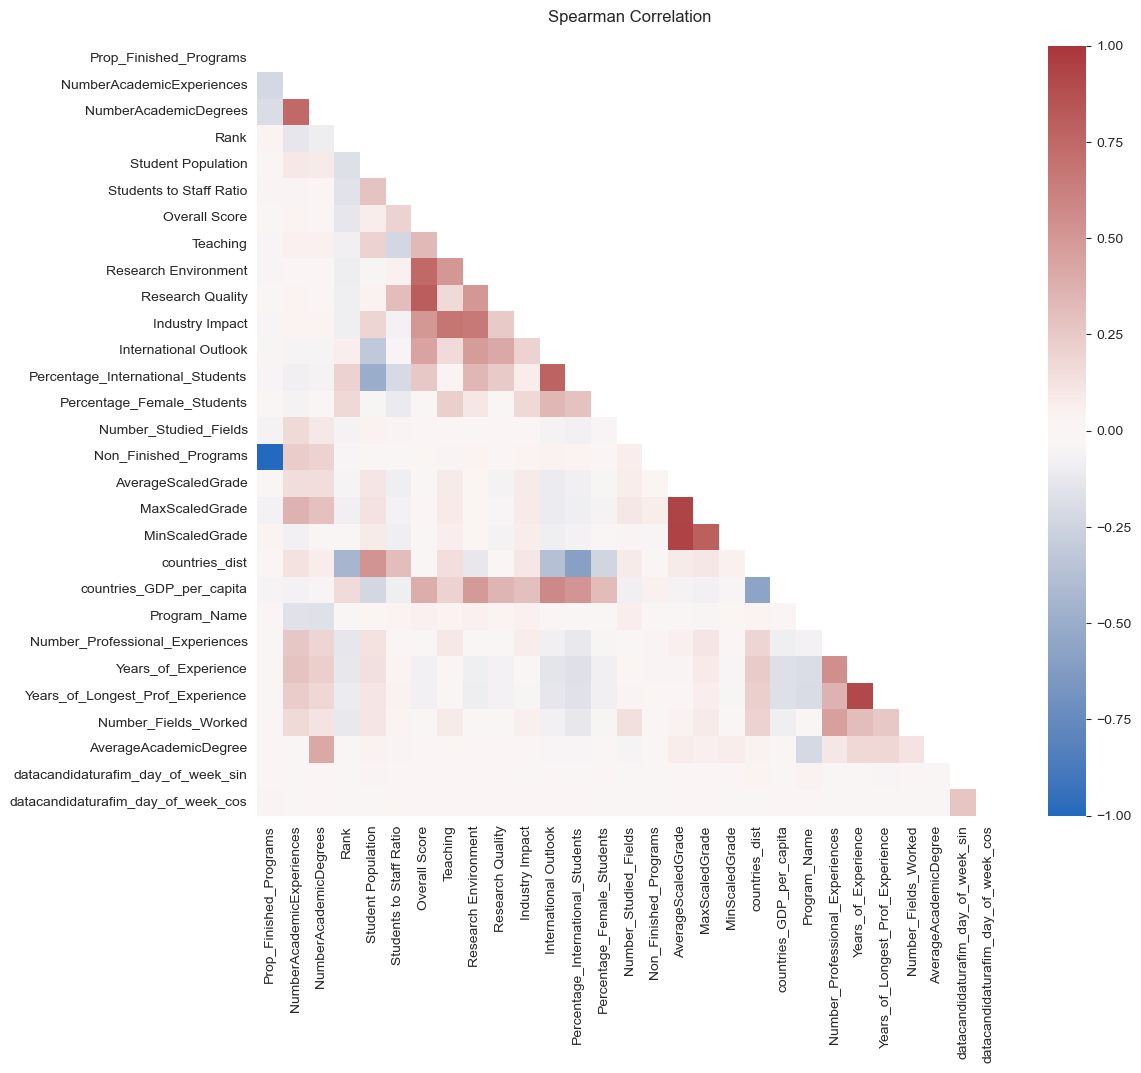

High Correlation: Prop_Finished_Programs and Non_Finished_Programs - Correlation: -0.9996366884692726
High Correlation: NumberAcademicExperiences and NumberAcademicDegrees - Correlation: 0.7485011902499726
High Correlation: Overall Score and Research Environment - Correlation: 0.7464956621748827
High Correlation: Overall Score and Research Quality - Correlation: 0.805130040264684
High Correlation: International Outlook and Percentage_International_Students - Correlation: 0.7744203159711021
High Correlation: AverageScaledGrade and MaxScaledGrade - Correlation: 0.9357117659213264
High Correlation: AverageScaledGrade and MinScaledGrade - Correlation: 0.9399104756574524
High Correlation: MaxScaledGrade and MinScaledGrade - Correlation: 0.7923555571506454
High Correlation: Years_of_Experience and Years_of_Longest_Prof_Experience - Correlation: 0.9094120481124459


In [11]:
cor = tf.spearman_correlation(X_admissions_train_scaled, numerical_variables, 0.7)

-------
### <font color='#BFD62F'>3.6.2. ANOVA</font> <a class="anchor" id="anova"></a>
[Back to Contents](#toc)

The Analysis of Variance technique (ANOVA) will compare the mean of a numerical variable for each of the categories of a categorical feature. If there is a statistically significant difference (showed by a p-value below 0.05), then a variable should not be discarded (according to this method).

We should note that these p-values will also decide which variable to keep for each pair of highly-correlated features identified using Spearman correlation.

In [12]:
tf.anova("classification",
         df = X_admissions_train_scaled,
         numerical_variables = numerical_variables,
         y = y_admissions_train,
         k = "all")

,Feature,P-Value,Significant,Top K
0,Prop_Finished_Programs,0.662686,False,True
1,NumberAcademicExperiences,0.000976,True,True
2,NumberAcademicDegrees,0.246852,False,True
3,Rank,0.000000,True,True
4,Student Population,0.000000,True,True
5,Students to Staff Ratio,0.000000,True,True
6,Overall Score,0.957969,False,True
7,Teaching,0.016317,True,True
8,Research Environment,0.573406,False,True
9,Research Quality,0.058970,False,True


-------
### <font color='#BFD62F'>3.6.3. Chi-Square Test of Independence</font> <a class="anchor" id="chisquare"></a>
[Back to Contents](#toc)

The Chi-Square Test of Independence has a similar reasoning to the ANOVA test, but comparing the frequency of each category of a categorical variable across the categories of another categorical variable (in our case, we will compare all our categorical features with the target). The null hypothesis is that there is no relationship between the variables. Therefore, if we reject it, we have statistical evidence that the variable is important to predict admissions.

In [13]:
tf.chi_square_test_independence("classification",
                                X_admissions_train_scaled,
                                categorical_variables,
                                y = y_admissions_train,
                                alpha = 0.05)

dprograma is IMPORTANT for Prediction
Is_Ranked is IMPORTANT for Prediction
Previous_IMS_Student is IMPORTANT for Prediction
Previous_Data_Studies is IMPORTANT for Prediction
Previous_Computer_Studies is NOT an important predictor. (Discard Previous_Computer_Studies from model)
Previous_Tech_Studies is NOT an important predictor. (Discard Previous_Tech_Studies from model)
Previous_Math_Studies is IMPORTANT for Prediction
Previous_Engineering_Studies is NOT an important predictor. (Discard Previous_Engineering_Studies from model)
Previous_Finance_Studies is NOT an important predictor. (Discard Previous_Finance_Studies from model)
Previous_Marketing_Studies is NOT an important predictor. (Discard Previous_Marketing_Studies from model)
Previous_Field_Studies is IMPORTANT for Prediction
is_Portuguese is IMPORTANT for Prediction
is_After_Working_Hours is IMPORTANT for Prediction
is_Fully_In_Person is IMPORTANT for Prediction
Working_Upon_Application is IMPORTANT for Prediction
Previous_Data

-------
### <font color='#BFD62F'>3.6.4. Point Biserial Correlation</font> <a class="anchor" id="biserial"></a>
[Back to Contents](#toc)

As was explained above, the point biserial correlation is a variation of Pearson's Correlation to assess the relationship between a binary and a numerical variable. The function below returns these correlations in a table format, adding an auxiliary column that will be "True" if the (rounded) absolute value of this correlation is above 0.1 - the value we will define as a threshold to accept or reject features.

In [14]:
tf.point_biserial("classification",
                  df = X_admissions_train_scaled,
                  target = y_admissions_train,
                  numerical_variables = numerical_variables,
                  threshold = 0.05)

,Variable,Value,|Value| >= Threshold
0,Prop_Finished_Programs,-0.004480,False
1,NumberAcademicExperiences,-0.033857,False
2,NumberAcademicDegrees,0.011893,False
3,Rank,0.090806,True
4,Student Population,-0.070599,True
5,Students to Staff Ratio,-0.118119,True
6,Overall Score,-0.000541,False
7,Teaching,0.024663,False
8,Research Environment,0.005783,False
9,Research Quality,-0.019393,False


-------
### <font color='#BFD62F'>3.6.5. Recursive Feature Elimination - Logistic Regression</font> <a class="anchor" id="rfelr"></a>
[Back to Contents](#toc)

In [15]:
#rfe_logreg_model = LogisticRegression(random_state = 92)

#tf.RFE("classification", X_admissions_train_scaled, X_admissions_val_scaled, y_admissions_train, y_admissions_val, rfe_logreg_model)

-------
### <font color='#BFD62F'>3.6.6. Recursive Feature Elimination - Support Vector Machines</font> <a class="anchor" id="rfesvm"></a>
[Back to Contents](#toc)

In [16]:
#rfe_svm_model = LinearSVC(random_state = 92)

#tf.RFE("classification", X_admissions_train_scaled, X_admissions_val_scaled, y_admissions_train, y_admissions_val, rfe_svm_model)

-------
### <font color='#BFD62F'>3.6.7. Random Forest</font> <a class="anchor" id="rf"></a>
[Back to Contents](#toc)

Our implementation (using sklearn) will return feature importance as the normalized (therefore, totalling 1) reduction of the Gini criterion (the default loss function) brought by that feature. We will discard the features (according to this method) whose importance falls below the defined threshold.

In [17]:
rf_fs_model = RandomForestClassifier(random_state = 92)

tf.random_forest_feature_selection(X_admissions_train_scaled, y_admissions_train, 0.02, rf_fs_model)

-------
### <font color='#BFD62F'>3.6.8. Least Absolute Shrinkage and Selection Operator (LASSO)</font> <a class="anchor" id="lasso"></a>
[Back to Contents](#toc)

Similarly to the Random Forest, our decision will be to keep the features whose absolute weight in the cost function formula is above the defined threshold.

In [18]:
tf.lasso(X_admissions_train_scaled, y_admissions_train, threshold = 0.075)

LASSO picked 60 variables and eliminated the other 5 variables.


-------
### <font color='#BFD62F'>3.6.9. Conclusion</font> <a class="anchor" id="conclusion"></a>
[Back to Contents](#toc)

The decisions for each of the implemented feature selection techniques were compilated in the following Excel sheet, whose results can be displayed as follows.

We opted to keep features that were voted to be kept by the majority of the techniques to which they were applied (4/7 for numerical variables, and 3/5 for categorical variables). We dedided not to drop the variables marked as "Keep*" due to our understanding of the problem and their potential value to the models, despite having been narrowly eliminated. The exception is the `idgenero` variable. Although it is fantastic (in terms of Nova IMS' operations) that the applicants' gender does not impact admissions, we cannot prove that our ML solution is also neutral regarding this field unless we include it in our model. Therefore, it will be maintained for the following steps of our study.

On the contrary, we will drop `MaxScaledGrade` and `MinScaledGrade` due to their very high correlation with `AverageScaledGrade`. We believe that the latter is well representative of the three, and having them all could prove to be confusing to the models, due to the introduction of more noise (and more dimensionality).

In [19]:
excel_path = "Feature Selection.xlsx"
sheet_name = "Admissions"
wb = load_workbook(excel_path, data_only=True)
sheet = wb[sheet_name]

fs_table = pd.DataFrame(sheet.values, columns = [cell.value for cell in sheet[1]])
fs_table.drop(index = 0, inplace = True)
styled_df = fs_table.style.apply(lambda row: [tf.highlight_cell(val, column) for val, column in zip(row, fs_table.columns)], axis=1)
styled_df

,Variable,Spearman,ANOVA,Chi-Square,Point Biserial,RFE - LogReg,RFE - LinSVM,Random Forest,LASSO,Decision
1,Prop_Finished_Programs,Discard,Discard,-,Discard,Keep,Keep,Discard,Keep,Discard
2,NumberAcademicExperiences,Keep,Keep,-,Discard,Keep,Keep,Discard,Keep,Keep
3,NumberAcademicDegrees,Discard,Discard,-,Discard,Keep,Keep,Discard,Keep,Discard
4,Rank,Keep,Keep,-,Keep,Discard,Discard,Discard,Discard,Keep*
5,Student Population,Keep,Keep,-,Keep,Discard,Discard,Discard,Discard,Discard
6,Students to Staff Ratio,Keep,Keep,-,Keep,Keep,Keep,Discard,Keep,Keep
7,Overall Score,Discard,Discard,-,Discard,Keep,Keep,Discard,Keep,Discard
8,Teaching,Keep,Keep,-,Discard,Keep,Keep,Discard,Keep,Keep
9,Research Environment,Keep,Discard,-,Discard,Keep,Keep,Discard,Discard,Discard
10,Research Quality,Keep,Discard,-,Discard,Keep,Keep,Discard,Discard,Discard


In [20]:
variables_to_keep = fs_table[(fs_table["Decision"].isin(["Keep", "Keep*"]))]["Variable"].tolist()

X_admissions_train_scaled = X_admissions_train_scaled[variables_to_keep]
X_admissions_val_scaled = X_admissions_val_scaled[variables_to_keep]

X_admissions_train_scaled.head()

,NumberAcademicExperiences,Rank,Students to Staff Ratio,Teaching,Industry Impact,Percentage_International_Students,Percentage_Female_Students,Non_Finished_Programs,AverageScaledGrade,countries_dist,countries_GDP_per_capita,Program_Name,AverageAcademicDegree,dprograma,Previous_IMS_Student,Previous_Math_Studies,Previous_Field_Studies,is_Portuguese,is_After_Working_Hours,is_Fully_In_Person,Previous_Analytics_Jobs,Previous_Jobs_in_Partners,nivelInglesCompreensao,nivelInglesEscrita,HighestAcademicDegree,idgenero,datacandidaturafim_month
6442,0.0,0.700191,0.263836,0.071349,0.019002,0.000000,0.428571,0.0,0.84,0.192282,0.009479,0.026121,0.6,1,0,0,0,0,0,1,0,0,1.0,1.0,0.6,0.5,0.363636
7521,0.5,1.000000,0.127369,0.096990,0.086698,0.032258,0.395604,0.0,0.96,0.470735,0.017317,0.119661,0.7,0,0,0,0,0,0,1,0,0,0.4,0.4,0.8,0.0,0.181818
13488,0.0,1.000000,0.100834,0.164994,0.239905,0.172043,0.505495,0.0,0.60,0.000000,0.211932,0.021885,0.6,0,0,0,0,1,0,1,0,0,0.8,0.8,0.6,0.0,0.636364
10078,0.0,1.000000,0.100834,0.164994,0.239905,0.172043,0.505495,0.0,0.60,0.000000,0.211932,0.213555,0.6,0,0,0,0,1,0,1,0,0,0.2,0.2,0.6,0.5,0.181818
2367,0.0,1.000000,0.100834,0.164994,0.239905,0.172043,0.505495,0.0,0.80,0.000000,0.211932,0.345217,0.8,0,0,0,1,1,0,1,1,0,0.8,0.8,0.8,0.0,0.272727


In [21]:
numerical_variables_admissions = [var for var in numerical_variables if var in variables_to_keep]
binary_variables_admissions = [var for var in binary_variables if var in variables_to_keep]
categorical_variables_admissions = [var for var in categorical_variables if var in variables_to_keep]

## <font color='#BFD62F'>3.7. DBSCAN for Outlier Removal</font> <a class="anchor" id="dbscan"></a>
[Back to Contents](#toc)

Density-Based Spatial Clustering of Applications with Noise (commonly known as DBSCAN) is a popular algorithm to perform density-based clustering, which groups observations according to the density of the regions surrounding it in the feature space.

Our implementation (adapted from [Pierian Training](https://pieriantraining.com/dbscan-for-outlier-detection-in-python-and-scikit-learn-machine-learning-in-python/) and [Medium](https://medium.com/@dilip.voleti/dbscan-algorithm-for-fraud-detection-outlier-detection-in-a-data-set-60a10ad06ea8)) will retrieve the outliers as per this algorithm, which are observations (applicants) that are in a sparser region of the feature space.

Since our data has more than 2 dimensions, we will define our ideal number of neighbours by doing 2 * number of dimensions in the data. [(Sander et al., 1998)](https://doi.org/10.1023/A:1009745219419)

In [22]:
neigh = NearestNeighbors(n_neighbors = 2 * len(numerical_variables_admissions) - 1)
nbrs = neigh.fit(X_admissions_train_scaled[numerical_variables_admissions])
distances, indices = nbrs.kneighbors(X_admissions_train_scaled[numerical_variables_admissions])

print("Number of neighbours:", 2 * len(numerical_variables_admissions) - 1)

Number of neighbours: 25


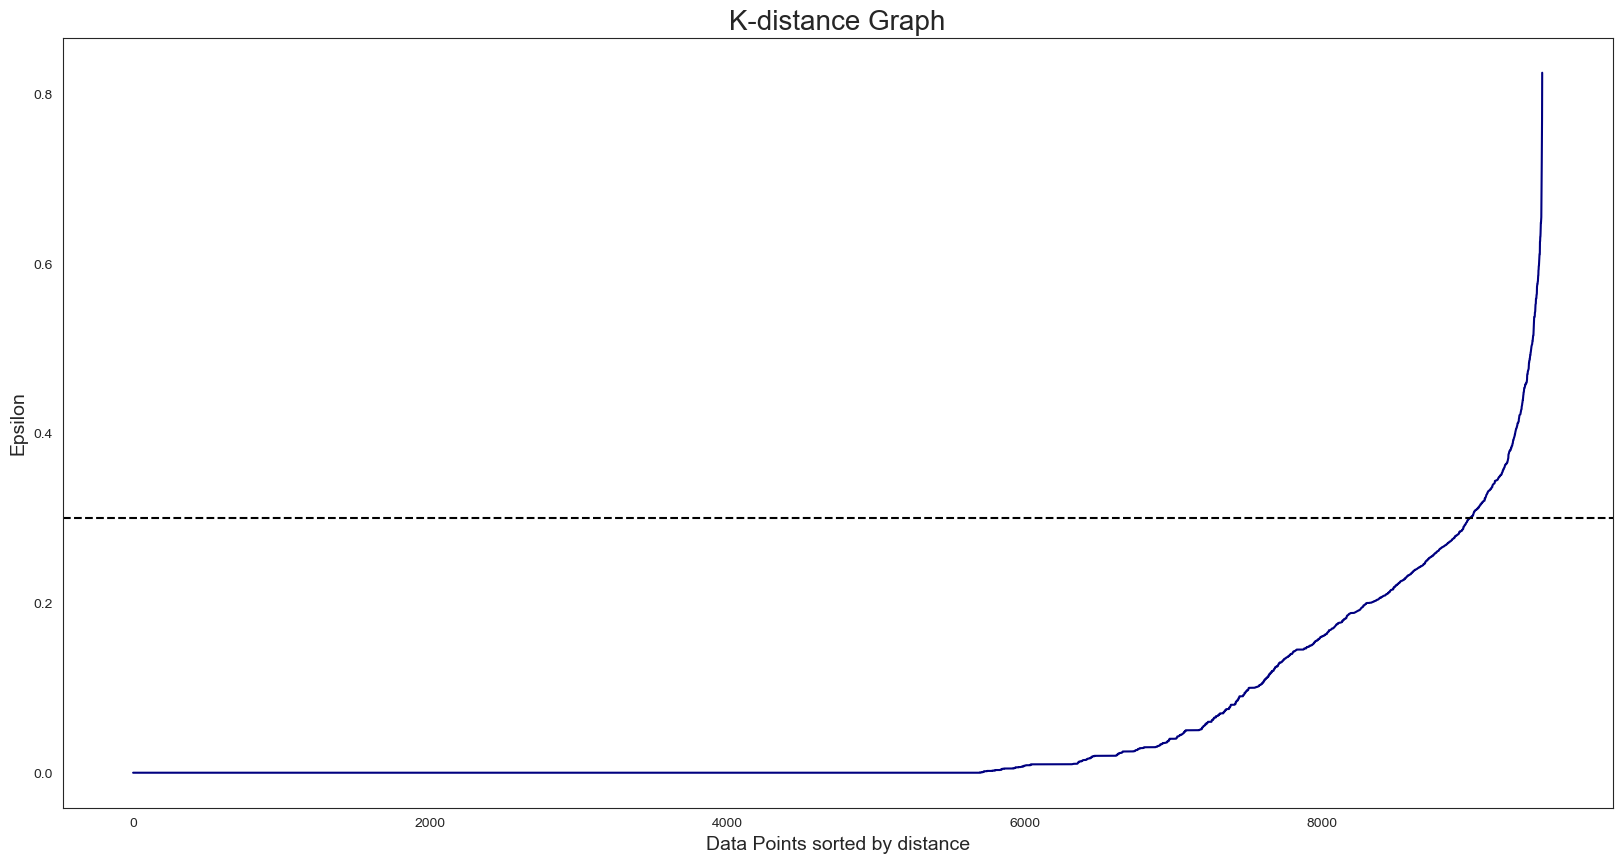

In [23]:
distances = np.sort(distances, axis = 0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances, color = "navy")
plt.axhline(y = 0.3, color = "black", linestyle = "--") 
plt.title("K-distance Graph", fontsize = 20)
plt.xlabel("Data Points sorted by distance", fontsize = 14)
plt.ylabel("Epsilon", fontsize = 14)
plt.show()

Contrary to what could be expected, there is not a clear frontier that separates what is an outlier and what isn't (we would expect for a much bigger slope after a certain number of data points). Therefore, it seems that our DBSCAN solution, even with a considerably high value for the epsilon parameter (which defines the radius of the neighbourhood), will identify too many observations as outliers - which raises the question to if they really are outliers in that case.

In [24]:
dbscan_out = DBSCAN(eps = 0.3, min_samples = 2 * len(numerical_variables_admissions) - 1).fit(
    X_admissions_train_scaled[numerical_variables_admissions])

outliers_dbscan = X_admissions_train_scaled[dbscan_out.labels_ == -1]
outliers_dbscan

,NumberAcademicExperiences,Rank,Students to Staff Ratio,Teaching,Industry Impact,Percentage_International_Students,Percentage_Female_Students,Non_Finished_Programs,AverageScaledGrade,countries_dist,countries_GDP_per_capita,Program_Name,AverageAcademicDegree,dprograma,Previous_IMS_Student,Previous_Math_Studies,Previous_Field_Studies,is_Portuguese,is_After_Working_Hours,is_Fully_In_Person,Previous_Analytics_Jobs,Previous_Jobs_in_Partners,nivelInglesCompreensao,nivelInglesEscrita,HighestAcademicDegree,idgenero,datacandidaturafim_month
13177,0.5,0.484747,0.103108,0.269788,0.598575,0.021505,0.439560,0.0,0.770000,0.407954,0.076175,0.008825,0.300000,0,0,0,1,0,0,1,1,0,0.6,0.4,0.6,0.5,0.454545
3551,0.0,1.000000,0.132676,0.412207,0.973872,0.384409,0.524725,0.0,0.870000,0.083090,0.413010,0.854924,0.600000,1,0,0,0,0,0,1,1,0,0.8,0.6,0.6,0.5,0.181818
11692,0.0,0.128217,0.326763,0.272018,0.690024,1.000000,0.527473,0.0,0.630000,0.497439,0.094176,0.666784,0.600000,1,0,0,0,0,0,1,0,0,0.4,0.4,0.6,0.0,0.090909
1313,0.5,0.495234,0.104625,0.096990,0.136580,0.193548,0.505495,0.5,0.650000,0.000000,0.211932,0.110131,0.700000,0,0,0,0,1,0,1,0,0,0.4,0.4,0.8,0.5,0.909091
2880,1.0,1.000000,0.093252,0.255295,0.345606,0.010753,0.505495,0.5,0.746667,0.407954,0.076175,0.374162,0.666667,1,0,0,1,0,0,1,0,1,1.0,1.0,0.8,0.0,0.636364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1502,0.5,1.000000,0.128886,0.290970,0.497625,0.268817,0.505495,0.5,0.865000,0.069639,0.354671,0.374162,0.400000,1,0,0,0,0,0,1,0,0,0.8,0.8,0.6,0.5,0.090909
4748,0.0,0.738799,0.053071,0.259755,0.460808,0.043011,0.582418,0.0,0.720000,0.276304,0.636048,0.037769,0.600000,1,0,0,0,0,0,1,0,0,1.0,1.0,0.6,0.0,0.545455
2296,0.0,0.034318,0.128127,0.415831,0.984561,0.236559,0.560440,0.0,0.700000,0.000000,0.211932,0.079068,0.400000,0,0,0,0,1,0,1,0,0,0.8,0.8,0.4,0.5,0.272727
11020,1.0,0.790753,0.097043,0.148272,0.086698,0.000000,0.439560,0.0,0.866667,0.000000,0.211932,1.000000,0.666667,1,0,0,1,1,1,1,0,0,0.6,0.4,0.8,0.0,0.636364


In [25]:
len(X_admissions_train_scaled)

9483

Since DBSCAN identified almost 19% of our dataset as being outliers (even with a higher threshold), __we will choose not to remove any observation from the dataset__. It is not clear that there are applicants whose characteristics fall far from the common behaviour, and therefore we will allow our prediction models to learn using all these observations.

Following this, let's now move to our last preprocessing stage, oversampling.

## <font color='#BFD62F'>3.8. Oversampling</font> <a class="anchor" id="oversampling"></a>
[Back to Contents](#toc)

As we have been able to learn from our interventions so far, there is a notorious imbalance towards the positive class of our dataset - which represents the applicants that were admitted to Nova IMS' postgraduates and masters' programs. Our training data contains much more of these observations than rejected candidates, which will naturally lead the prediction models to focus more on this majority class. Since this deviates from our intended analysis (we are equally interested in predicting admitted and rejected students*), we will check if it is beneficial to resort to oversampling techniques that will balance the weight of each target class in the total number of observations. Undersampling (or a mix of both approaches) was not considered due to our small number of observations, which would then leave us with even less samples to train and validate our predictions on. To that extent, we will test the __Synthetic Minority Over-sampling Technique (SMOTE)__, __Adaptive Synthetic (ADASYN)__, __Random Oversampler__, __SMOTE for Nominal and Continuous (SMOTENC)__, __Borderline SMOTE__, __K-Means SMOTE__, and __SVM-SMOTE__ algorithms against a baseline Neural Network with default parameters. The technique returning the highest F1 score (assessed through the validation dataset) will be chosen to resample our dataset.

This step was done after feature selection following the conclusions of [Tsai et al. (2024)](https://doi.org/10.1016/j.asoc.2024.111267) and our own conclusions taken from [Blagus & Lusa's (2013)](https://doi.org/10.1186/1471-2105-14-106) work.

*it is as important to predict admitted and rejected applicants since Nova IMS is interested in accepting students with a strong academic potential, but also on not letting go of individuals that exhibit positive academic capabilities.

In [26]:
# obm stands for "Oversampling Baseline Model"
obm = MLPClassifier(random_state = 92)
obm.fit(X_admissions_train_scaled, y_admissions_train)

y_pred_obm = obm.predict(X_admissions_val_scaled)
obm_f1 = f1_score(y_admissions_val, y_pred_obm)
obm_precision = precision_score(y_admissions_val, y_pred_obm)
obm_recall = recall_score(y_admissions_val, y_pred_obm)

print(f"Oversampling Baseline Model | F1 Score: {obm_f1:.4f} | Precision: {obm_precision:.4f} | Recall: {obm_recall:.4f}")

Oversampling Baseline Model | F1 Score: 0.8897 | Precision: 0.8380 | Recall: 0.9481


In [27]:
# SVMSMOTE was facing some issues handling columns with uint8 data type
for col in X_admissions_train_scaled.select_dtypes(include = ["uint8"]).columns:
    X_admissions_train_scaled[col] = X_admissions_train_scaled[col].astype("int8")

tf.evaluate_oversampling_techniques(X_admissions_train_scaled,
                                    X_admissions_val_scaled,
                                    y_admissions_train,
                                    y_admissions_val,
                                    MLPClassifier(random_state = 92),
                                    categorical_variables_admissions,
                                    neighbors = 10,
                                    random_seed = 92)

Best sampling technique: KMeansSMOTE with F1 score: 0.8644400785854617


,Sampler,F1 score,Precision,Recall
5,KMeansSMOTE,0.864440,0.851190,0.878109
6,SVMSMOTE,0.848494,0.867265,0.830519
1,ADASYN,0.807921,0.873350,0.751612
3,SMOTENC,0.799472,0.864383,0.743629
2,RandomOverSampler,0.781320,0.890416,0.696039
4,BorderlineSMOTE,0.775779,0.888625,0.688364
0,SMOTE,0.772452,0.885012,0.685293


Contrary to our expectations, none of the oversampling techniques outperformed the baseline model employed. For this reason, and considering that the trade-off between precision and recall is not extremely significant in the baseline model (in fact, there are oversmpling techniques that attained more imbalanced scores), we will proceed to the modelling stage using the imbalanced dataset.

## <font color='#BFD62F'>3.9. Storing the Dataframes</font> <a class="anchor" id="storing"></a>
[Back to Contents](#toc)

Marking the end of our preprocessing, we will store the dataframes to be used for modelling in the next notebook. See you there! 👋

In [28]:
%store X_admissions_train_scaled
%store X_admissions_val_scaled
%store y_admissions_train
%store y_admissions_val

#%store X_admissions_train
#%store X_admissions_val

%store numerical_variables_admissions
%store binary_variables_admissions
%store categorical_variables_admissions

Stored 'X_admissions_train_scaled' (DataFrame)
Stored 'X_admissions_val_scaled' (DataFrame)
Stored 'y_admissions_train' (Series)
Stored 'y_admissions_val' (Series)
Stored 'numerical_variables_admissions' (list)
Stored 'binary_variables_admissions' (list)
Stored 'categorical_variables_admissions' (list)
